<a href="https://colab.research.google.com/github/drfperez/lightkurve/blob/main/DobleEscletxa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# Importar llibreries necessàries
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# Paràmetres constants
distancia_a_pantalla = 1.0  # Distància fins a la pantalla (m)

# Funció per calcular la intensitat a la pantalla
def intensitat(x, amplada_escletxa, distancia_entre_escletxes, longitud_ona):
    k = 2 * np.pi / longitud_ona
    beta = k * amplada_escletxa * x / distancia_a_pantalla
    alpha = k * distancia_entre_escletxes * x / distancia_a_pantalla
    beta = np.where(beta == 0, 1e-6, beta)  # Evitar divisió per zero
    return (np.sin(beta) / beta)**2 * (np.cos(alpha))**2

# Funció per actualitzar el gràfic
def actualitza_grafic(num_fotons=10000, amplada_escletxa=0.1, distancia_entre_escletxes=0.5, longitud_ona=0.5):
    # Domini de la posició a la pantalla
    x_pantalla = np.linspace(-2, 2, 1000)
    intensitats = intensitat(x_pantalla, amplada_escletxa, distancia_entre_escletxes, longitud_ona)

    # Normalitzar la intensitat per a la simulació de fotons
    intensitats_normalitzades = intensitats / np.max(intensitats)

    # Generar posicions aleatòries per als fotons segons la distribució de la intensitat
    fotons_x = np.random.choice(x_pantalla, size=int(num_fotons), p=intensitats_normalitzades/np.sum(intensitats_normalitzades))

    # Crear gràfics
    plt.figure(figsize=(14, 6))

    # Subgràfic 1: Patró d'interferència
    plt.subplot(1, 2, 1)
    plt.plot(x_pantalla, intensitats_normalitzades, color='blue', label="Patró d'interferència")
    plt.title("Patró d'interferència")
    plt.xlabel("Posició a la pantalla (m)")
    plt.ylabel("Intensitat normalitzada")
    plt.grid(True)
    plt.legend()

    # Subgràfic 2: Distribució dels fotons
    plt.subplot(1, 2, 2)
    plt.hist(fotons_x, bins=50, density=True, color='orange', alpha=0.7, edgecolor='black')
    plt.title("Distribució dels fotons")
    plt.xlabel("Posició a la pantalla (m)")
    plt.ylabel("Densitat de fotons")
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Creació dels sliders interactius per actualitzar automàticament
interact(actualitza_grafic,
         num_fotons=FloatSlider(value=10000, min=1000, max=50000, step=1000, description='Nº fotons'),
         amplada_escletxa=FloatSlider(value=0.1, min=0.05, max=0.5, step=0.01, description='Amplada escletxa'),
         distancia_entre_escletxes=FloatSlider(value=0.5, min=0.1, max=1.0, step=0.05, description='Distància escletxes'),
         longitud_ona=FloatSlider(value=0.5, min=0.3, max=1.0, step=0.05, description='Longitud d\'ona'))

interactive(children=(FloatSlider(value=10000.0, description='Nº fotons', max=50000.0, min=1000.0, step=1000.0…

<function __main__.actualitza_grafic(num_fotons=10000, amplada_escletxa=0.1, distancia_entre_escletxes=0.5, longitud_ona=0.5)>

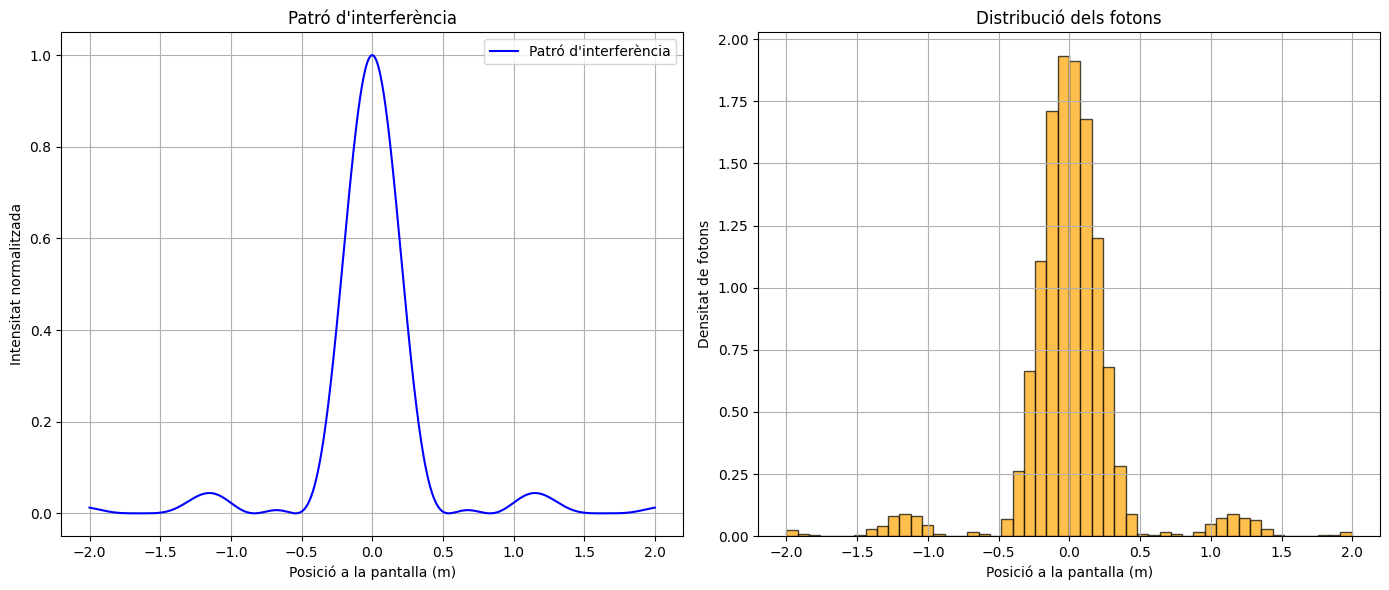

In [ ]:

# Importar llibreries necessàries
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, Button, HBox, VBox
from IPython.display import display, clear_output

# Distància fixa a la pantalla
distancia_a_pantalla = 1.0

# Funció per calcular la intensitat a la pantalla
def intensitat(x, amplada_escletxa, distancia_entre_escletxes, longitud_ona):
    k = 2 * np.pi / longitud_ona
    beta = k * amplada_escletxa * x / distancia_a_pantalla
    alpha = k * distancia_entre_escletxes * x / distancia_a_pantalla
    beta = np.where(beta == 0, 1e-6, beta)  # Evitar divisió per zero
    return (np.sin(beta) / beta)**2 * (np.cos(alpha))**2

# Funció per generar el gràfic
def actualitza_grafic(num_fotons=10000, amplada_escletxa=0.1, distancia_entre_escletxes=0.5, longitud_ona=0.5):
    x_pantalla = np.linspace(-2, 2, 1000)
    intensitats = intensitat(x_pantalla, amplada_escletxa, distancia_entre_escletxes, longitud_ona)

    # Normalitzar la intensitat
    intensitats_normalitzades = intensitats / np.max(intensitats)

    # Gràfic
    plt.figure(figsize=(10, 6))
    plt.plot(x_pantalla, intensitats_normalitzades, label="Patró d'interferència", color='green')
    plt.title("Simulació de l'experiment de la doble escletxa")
    plt.xlabel("Posició a la pantalla (m)")
    plt.ylabel("Intensitat normalitzada")
    plt.legend()
    plt.grid(True)
    plt.show()

# Creació dels sliders interactius
num_fotons_slider = FloatSlider(value=10000, min=1000, max=50000, step=1000, description='Nº fotons:')
amplada_slider = FloatSlider(value=0.1, min=0.05, max=0.5, step=0.01, description='Amplada escletxa:')
distancia_slider = FloatSlider(value=0.5, min=0.1, max=1.0, step=0.05, description='Distància escletxes:')
longitud_slider = FloatSlider(value=0.5, min=0.3, max=1.0, step=0.05, description='Longitud d\'ona:')

# Botó per actualitzar el gràfic
boto_actualitza = Button(description="Actualitza el gràfic", button_style='success')

# Sortida per mostrar el gràfic
output = display

# Funció per actualitzar el gràfic en clicar el botó
def actualitza(event):
    clear_output(wait=True)
    display(HBox([VBox([num_fotons_slider, amplada_slider, distancia_slider, longitud_slider, boto_actualitza])]))
    actualitza_grafic(num_fotons_slider.value, amplada_slider.value, distancia_slider.value, longitud_slider.value)

# Assignar l'acció al botó
boto_actualitza.on_click(actualitza)

# Mostrar els sliders i el botó inicialment
display(HBox([VBox([num_fotons_slider, amplada_slider, distancia_slider, longitud_slider, boto_actualitza])]))

In [ ]:

# Importar llibreries necessàries
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# Paràmetres constants
distancia_a_pantalla = 1.0  # Distància fins a la pantalla (m)

# Funció per calcular la intensitat (probabilitat de distribució)
def intensitat(x, amplada_escletxa, distancia_entre_escletxes, longitud_ona):
    k = 2 * np.pi / longitud_ona
    beta = k * amplada_escletxa * x / distancia_a_pantalla
    alpha = k * distancia_entre_escletxes * x / distancia_a_pantalla
    beta = np.where(beta == 0, 1e-6, beta)  # Evitar divisió per zero
    return (np.sin(beta) / beta)**2 * (np.cos(alpha))**2

# Simulació de l'impacte de fotons
def simula_fotons(num_fotons=1000, amplada_escletxa=0.1, distancia_entre_escletxes=0.5, longitud_ona=0.5):
    # Convertir `num_fotons` a enter
    num_fotons = int(num_fotons)

    # Domini de la posició a la pantalla
    x_pantalla = np.linspace(-2, 2, 1000)
    intensitats = intensitat(x_pantalla, amplada_escletxa, distancia_entre_escletxes, longitud_ona)

    # Normalitzar la intensitat per utilitzar-la com probabilitat
    intensitats_normalitzades = intensitats / np.sum(intensitats)

    # Generar les posicions dels fotons segons la distribució
    fotons_x = np.random.choice(x_pantalla, size=num_fotons, p=intensitats_normalitzades)

    # Crear gràfics
    plt.figure(figsize=(14, 6))

    # Subgràfic 1: Impactes individuals acumulatius
    plt.subplot(1, 2, 1)
    plt.scatter(fotons_x, np.random.uniform(-0.02, 0.02, size=num_fotons), s=1, alpha=0.5, color='blue')
    plt.title(f"Impactes individuals dels fotons (N = {num_fotons})")
    plt.xlabel("Posició a la pantalla (m)")
    plt.ylabel("Impactes")
    plt.grid(True)

    # Subgràfic 2: Patró d’interferència teòric
    plt.subplot(1, 2, 2)
    plt.plot(x_pantalla, intensitats / np.max(intensitats), label="Patró d'interferència", color='orange')
    plt.title("Patró teòric d’interferència")
    plt.xlabel("Posició a la pantalla (m)")
    plt.ylabel("Intensitat normalitzada")
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

# Creació dels sliders interactius per visualitzar la simulació
interact(simula_fotons,
         num_fotons=FloatSlider(value=100, min=10, max=5000, step=10, description='Nº fotons'),
         amplada_escletxa=FloatSlider(value=0.1, min=0.05, max=0.5, step=0.01, description='Amplada escletxa'),
         distancia_entre_escletxes=FloatSlider(value=0.5, min=0.1, max=1.0, step=0.05, description='Distància escletxes'),
         longitud_ona=FloatSlider(value=0.5, min=0.3, max=1.0, step=0.05, description='Longitud d\'ona'))

interactive(children=(FloatSlider(value=100.0, description='Nº fotons', max=5000.0, min=10.0, step=10.0), Floa…

<function __main__.simula_fotons(num_fotons=1000, amplada_escletxa=0.1, distancia_entre_escletxes=0.5, longitud_ona=0.5)>